# Percolation

In [14]:
from RandomLoop import StateSpace
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import json
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit

In [3]:
%load_ext snakeviz

In [4]:
%snakeviz m.loop_builder_fast((32,32))

 
*** Profile stats marshalled to file 'C:\\Users\\lollo\\AppData\\Local\\Temp\\tmpuq2lqbum'.
Embedding SnakeViz in this document...
<function display at 0x000001E5F4ED1B20>


  0%|          | 0/1000000 [00:00<?, ?it/s]

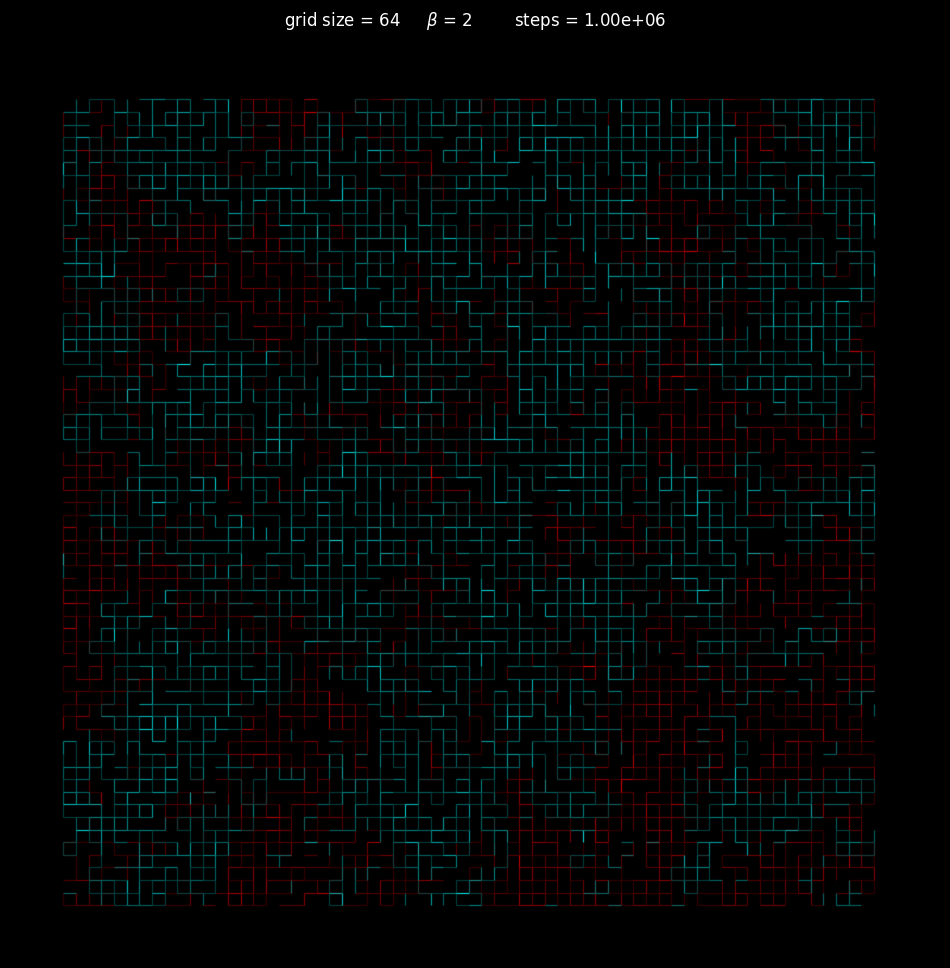

In [11]:
m = StateSpace(2, 64, 2)
m.step(1_000_000)
m.plot_overlap()

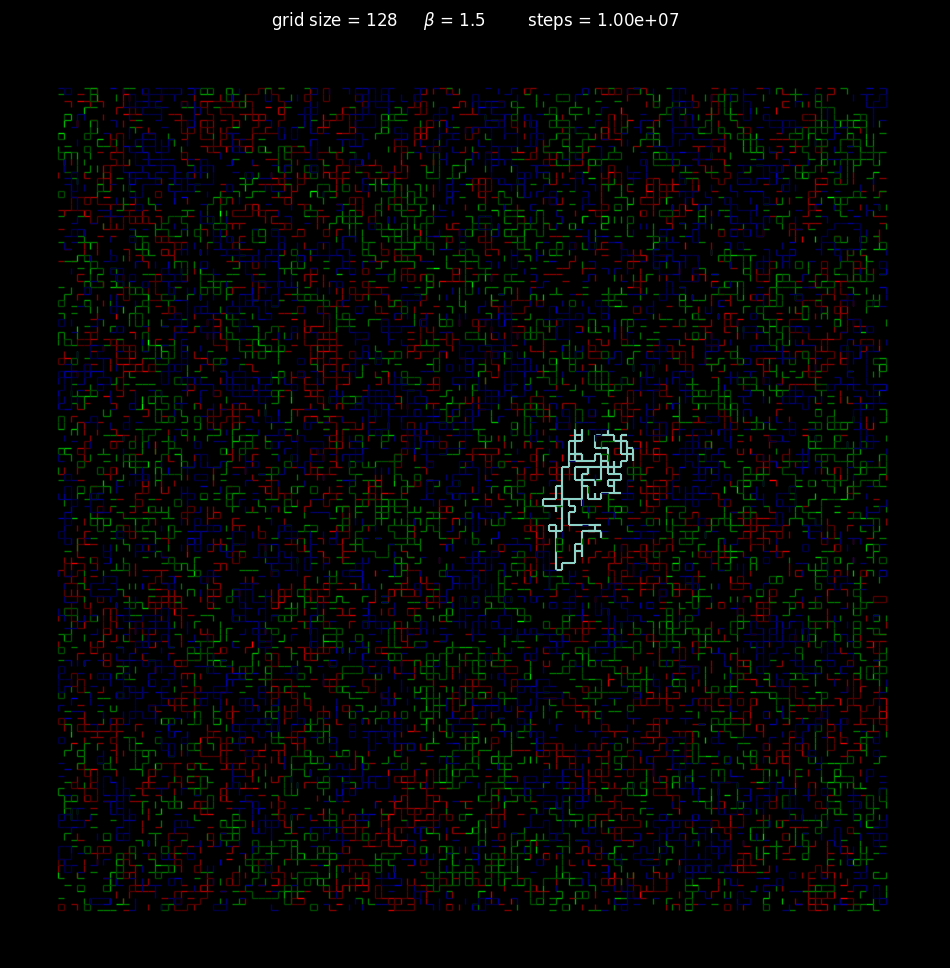

In [53]:
loops, lenghts = m.loop_builder_fast()

max_len = max(lenghts[0])
for l in loops[0]:
    if len(l) == max_len:
        m.plot_loop_overlap([[l], [], []])
        break


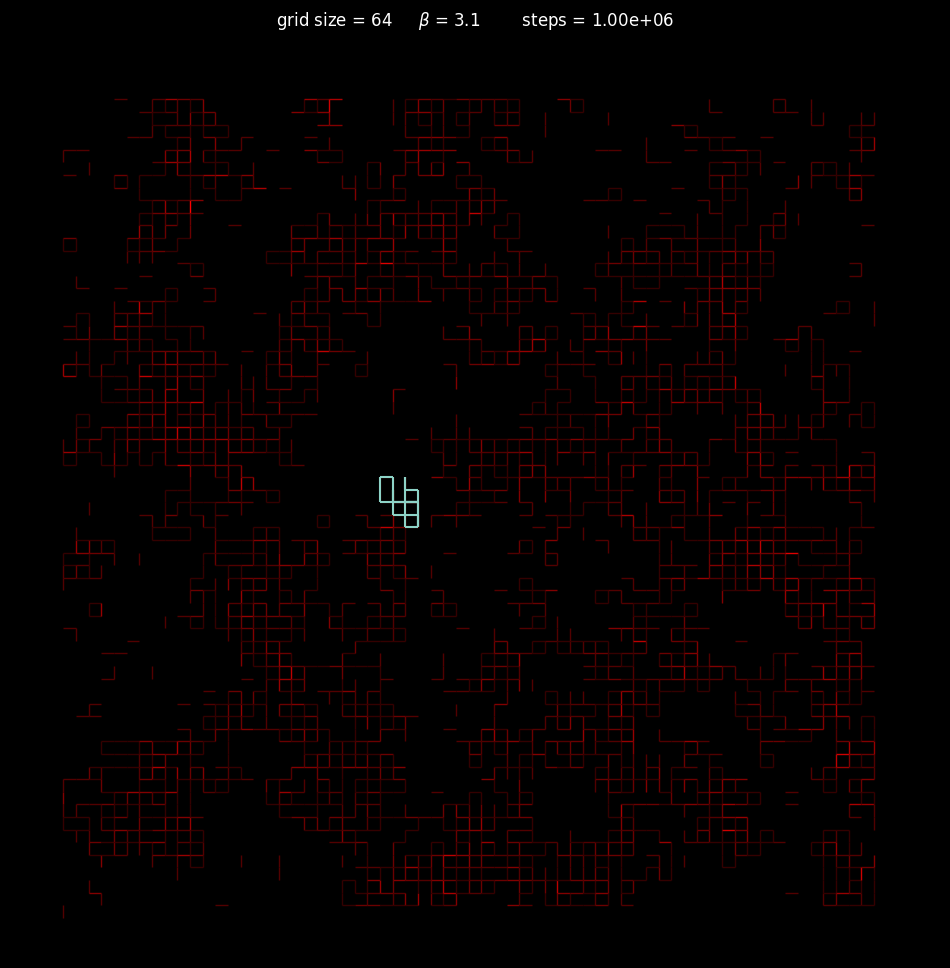

In [58]:
loops, _ = m.loop_builder_fast((27,30))

m.plot_loop_overlap(loops[0], color=0)


In [16]:
_[0][0]

13656

In [148]:
def read_perc_data(file_name):
    with open(file_name, 'r') as file:
        data_raw = json.load(file)

    data = {
        'percolation': np.array(data_raw['percolation'])
    }

    coords = {
        'betas': data_raw['params']['betas']
    }

    dims = {
        'percolation': ['beta']
    }

    idata = az.convert_to_inference_data(data, coords=coords, dims=dims)
    summary = az.summary(idata)
    print(summary['r_hat'])
    
    return summary['mean'].values, summary['mcse_mean'].values, data_raw['params']['betas']


In [150]:
#perc_prob_32, sigma_32 = read_perc_data('data\\percolation\\32_2024-04-15_16_47_22.json')
perc_prob_64, sigma_64, betas_64 =   read_perc_data('data\\percolation\\64_2024-04-09_20_38_24.json') #   '')  data\\percolation\\three_colors_64_2024-05-28_17_03_39.json
perc_prob_128, sigma_128, betas_128  = read_perc_data('data\\percolation\\128_2024-04-10_02_55_26.json')
perc_prob_256, sigma_256, betas_256  =   read_perc_data('data\\percolation\\3_color_256_2024-05-28_13_03_09.json') #read_perc_data('data\\percolation\\256_2024-04-12_20_47_02.json')
perc_prob_512, sigma_512, betas_512  = read_perc_data('data\\percolation\\512_2024-04-16_18_40_54.json')


#data\\percolation\\three_colors_64_2024-05-28_17_03_39.json


perc_probs = [perc_prob_64, perc_prob_128, perc_prob_256, perc_prob_512] 
sigmas = [sigma_64, sigma_128, sigma_256, sigma_512]

betas = [betas_64, betas_128, betas_256, betas_512]

C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


percolation[0]      NaN
percolation[1]      NaN
percolation[2]     1.11
percolation[3]     1.48
percolation[4]     1.80
percolation[5]     1.85
percolation[6]     1.75
percolation[7]     1.46
percolation[8]     1.09
percolation[9]     1.00
percolation[10]     NaN
percolation[11]     NaN
Name: r_hat, dtype: float64
percolation[0]      NaN
percolation[1]      NaN
percolation[2]      NaN
percolation[3]     1.28
percolation[4]     1.33
percolation[5]     1.47
percolation[6]     1.10
percolation[7]     1.00
percolation[8]      NaN
percolation[9]      NaN
percolation[10]     NaN
percolation[11]     NaN
Name: r_hat, dtype: float64
percolation[0]    1.01
percolation[1]    1.02
percolation[2]    1.05
percolation[3]    1.09
percolation[4]    1.03
percolation[5]    1.01
percolation[6]    1.11
percolation[7]     NaN
Name: r_hat, dtype: float64
percolation[0]     NaN
percolation[1]     NaN
percolation[2]     NaN
percolation[3]     NaN
percolation[4]    1.06
percolation[5]    1.02
percolation[6]    

C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFou

In [39]:
plt.style.use('default')
plt.style.use('seaborn-v0_8-muted')

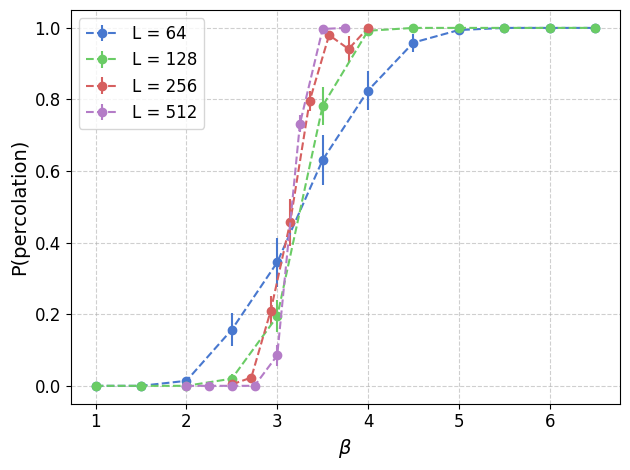

In [152]:
grid_sizes = ['L = 64', 'L = 128', 'L = 256', 'L = 512']


for i in range(len(perc_probs)):
    plt.errorbar(betas[i], perc_probs[i], sigmas[i], linestyle='--', marker='o',label = grid_sizes[i])



plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'P(percolation)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, markerscale=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}'))
plt.tight_layout()
plt.savefig('percolation.pdf')

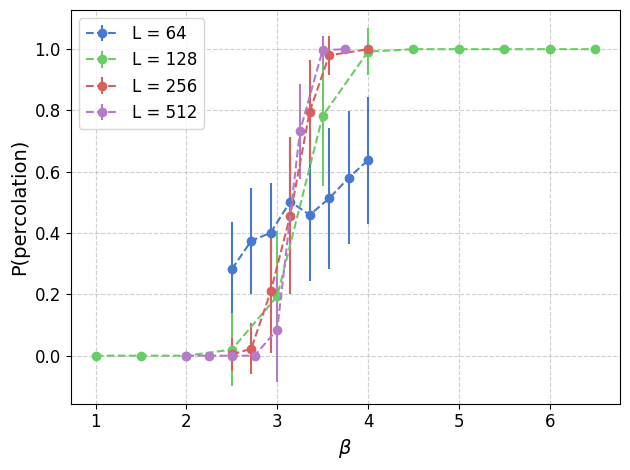

In [124]:
grid_sizes = ['L = 64', 'L = 128', 'L = 256', 'L = 512']

betas = [np.linspace(2.5, 4, 8)] + [np.arange(1, 7, 0.5)] + [[2.5, 2.7142857142857144, 2.9285714285714284, 3.142857142857143, 3.357142857142857, 3.571428571428571, 4.0]] + [np.arange(2, 4, 0.25)]

for i in range(len(perc_probs)):
    plt.errorbar(betas[i], perc_probs[i], np.sqrt(np.array(sigmas[i])), linestyle='--', marker='o',label = grid_sizes[i])



plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'P(percolation)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, markerscale=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}'))
plt.tight_layout()
#plt.savefig('percolation.pdf')

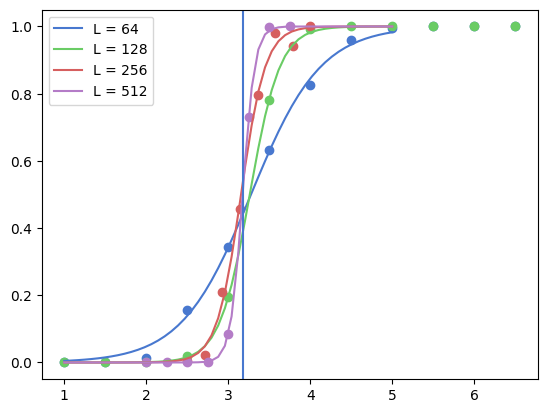

In [248]:
sigma_a = []
sigma_b = []

for i in range(len(perc_probs)):

    plt.scatter(betas[i], perc_probs[i])

    p, pcov = curve_fit(sigmoid, betas[i], perc_probs[i])
    sigma_a.append( np.sqrt(pcov[0,0]) )
    sigma_b.append( np.sqrt(pcov[1,1]) )

    plt.plot( np.linspace(1, 5, 50), sigmoid(np.linspace(1, 5, 50), *p), label=grid_sizes[i])

plt.axvline(x=3.18)
plt.legend()


In [249]:
sigma_a

[0.08571290366297382,
 0.05853788036169708,
 0.5384325736023987,
 0.21615262737962945]

# percolation treshold estimation

In [251]:
def sigmoid(x, a, b):
    return 1 / (1 + np.exp( -a*(x-b)) )

def linear(x, a, b):
    return a*x + b

eff_treshold = []
derivs = []

eff_treshold_sigma = []
for i in range(len(perc_probs)):
    p, pcov = curve_fit(sigmoid, betas[i], perc_probs[i])
    eff_treshold.append( p[1] )
    derivs.append( p[0]/4 )
    eff_treshold_sigma.append( pcov[1,1] )


In [295]:
sigma_a = [0.18571290366297382,
 0.25853788036169708,
 0.4384325736023987,
 0.21615262737962945]

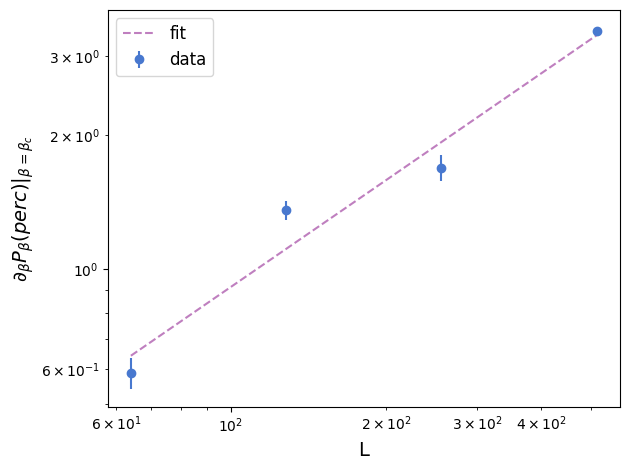

In [297]:
from matplotlib.ticker import LogLocator, NullFormatter, FixedLocator
L = np.array([64, 128, 256, 512])
derivs = np.array(derivs)

p, pcov = curve_fit(linear, np.log(L), np.log(derivs) )
X = np.linspace(64, 512, 50)
plt.plot(X, np.exp(linear(np.log(X), *p)), linestyle='--', label='fit', c='purple', alpha=0.5)
plt.errorbar(L, derivs, yerr=np.array(sigma_a)/4, fmt=' ', marker='o', label='data')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('L', fontsize=14)
plt.ylabel(r'$\partial_\beta P_\beta(perc)\vert_{\beta=\beta_c}$', fontsize=14)
#plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, markerscale=1)
# Customize major and minor ticks for x-axis
# Customize major ticks for x-axis



#plt.yticks(fontsize=12)
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}'))


plt.tight_layout()
plt.savefig('perc_nu.pdf')

In [246]:
print(f'a = {1/p[0]} +/- {np.sqrt(pcov[0,0]) * 1/p[0]**2 } ')

a = 1.2613166042320292 +/- 0.18548734598514266 


In [208]:
eff_treshold

[3.2776381364519964,
 3.2627814983700456,
 3.1562469567123927,
 3.1758653342087766]

In [210]:
eff_treshold_2 = np.array([3.2776381364519964,
 3.2427814983700456,
 3.205607909494894,
 3.1958653342087766])

3.1939047808940035


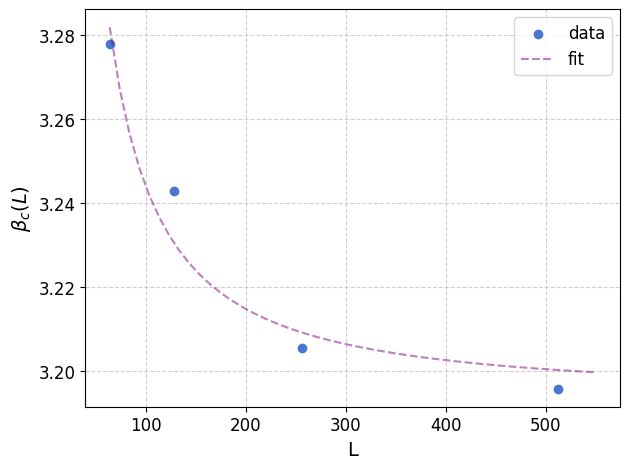

In [299]:
def scaling(x, p_c, A):
    return p_c + A * x**(-1.26)

L = [64, 128, 256, 512]

p, pcov = curve_fit(scaling, L, eff_treshold_2, p0=(3.2, 2), maxfev = 10_000)
print(p[0])

plt.scatter(L, eff_treshold_2, label='data')
plt.plot(np.linspace(64, 550, 50), scaling(np.linspace(64, 550, 50), *p), linestyle='--', label='fit', c='purple', alpha=0.5)
plt.xlabel('L', fontsize=14)
plt.ylabel(r'$\beta_c(L)$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, markerscale=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}'))
plt.tight_layout()
plt.savefig('perc_threshold.pdf')

In [301]:
np.sqrt(pcov[0,0])

0.007616770726750602

<ErrorbarContainer object of 3 artists>

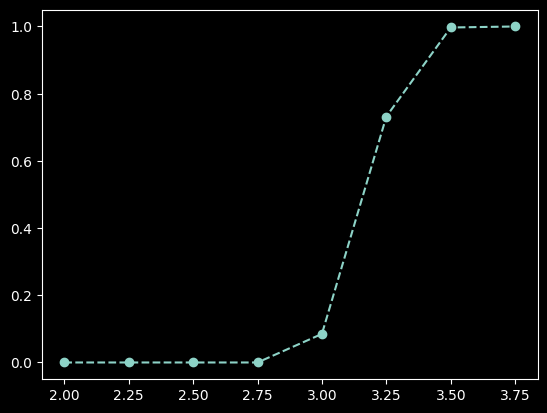

In [9]:
plt.errorbar(np.arange(2, 4, 0.25), perc_prob_512, linestyle='--', marker='o',label = grid_sizes[-1])

In [55]:
np.arange(2.75, 4, 0.5)

array([2.75, 3.25, 3.75])

In [54]:
np.arange(2.75, 4, 0.5)

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5])

In [22]:

with open('data\\percolation\\32_2024-04-15_16_47_22.json', 'r') as file:
        data_raw = json.load(file)

data = {
    'percolation': np.array(data_raw['percolation'])
}

coords = {
    'betas': data_raw['params']['betas']
}

dims = {
    'percolation': ['beta']
}

idata = az.convert_to_inference_data(data, coords=coords, dims=dims)
idata

Inference data with groups:
	> posterior

### One color

C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


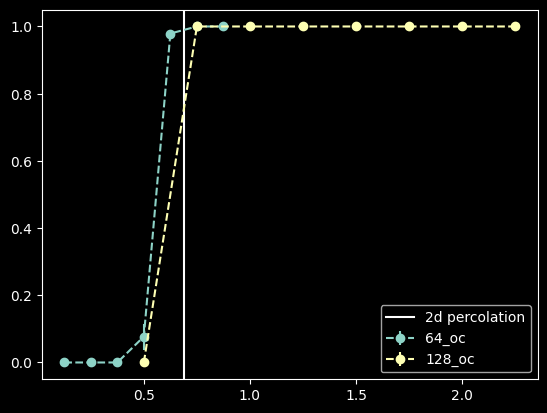

In [25]:
perc_prob_128_oc, sigma_128_oc = read_perc_data('data\\percolation\\one_color_128_2024-04-21_15_57_17.json')
perc_prob_64_oc, sigma_64_oc = read_perc_data('data\\percolation\\one_color_64_2024-04-21_16_00_44.json')
plt.errorbar(np.arange(0.125, 1, 0.125), perc_prob_64_oc, yerr=sigma_64_oc, linestyle='--', marker='o',label = '64_oc')
plt.errorbar(np.arange(0.5, 2.5, 0.25), perc_prob_128_oc, yerr=sigma_128_oc, linestyle='--', marker='o',label = '128_oc')
plt.axvline(x=0.69, label='2d percolation')
plt.legend()

In [22]:
n = 3000
-np.log(1 - 0.5**(1/n))

8.372996010537499

In [108]:
m = StateSpace(2, 128, 3, init='random')


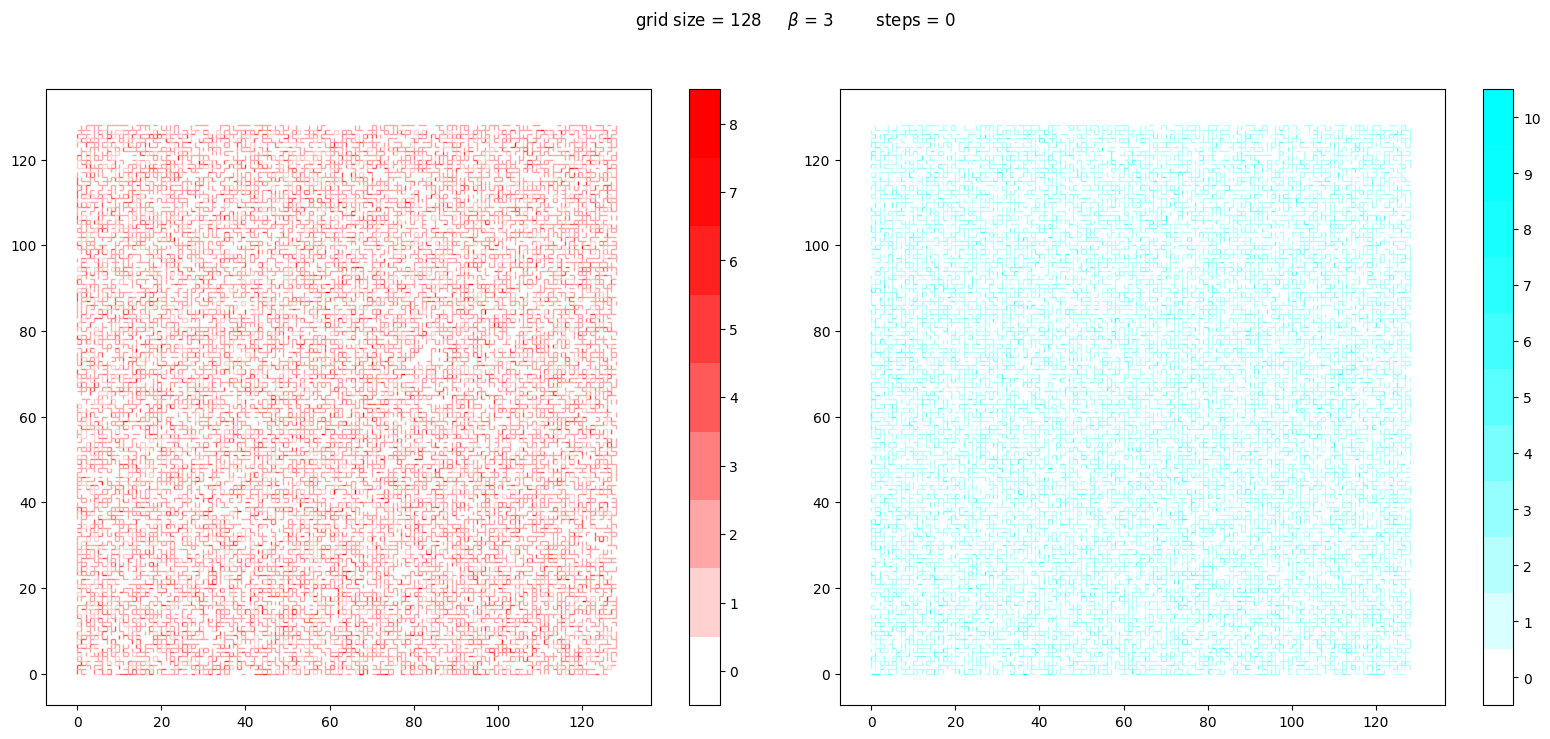

In [109]:
m.plot_grid(axis=True)


In [110]:
m.check_percolation()

1